In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import wandb
from benchmark import MixedBenchmark
from utils import get_wandb_run_dfs, calculate_hypervolume
import matplotlib.pyplot as plt
import numpy as np

In [3]:
api = wandb.Api()
wandb_settings = {"wandb_entity": "ceb-sre", "wandb_project": "bo_mixed"}

In [4]:
dfs = get_wandb_run_dfs(
    api, **wandb_settings, commit="12fe769b91c659f0b94edac69f7a1957c9fd5eca"
)

wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  


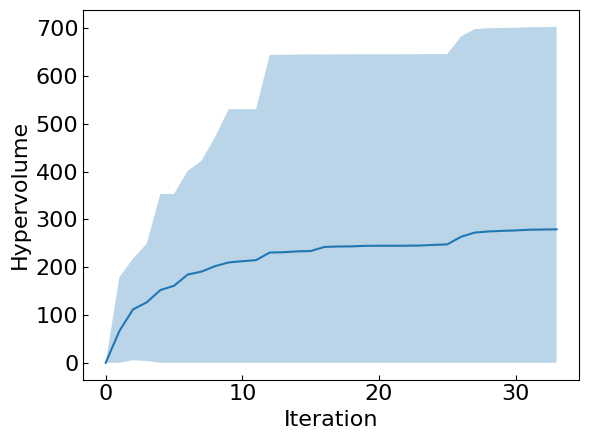

In [16]:
hvs = np.array([
    calculate_hypervolume(df, MixedBenchmark.setup_domain()) 
    for df in dfs
])
fig, ax = plt.subplots(1)
hvs_mean = hvs.mean(axis=0)
hvs_std = hvs.std(axis=0)
ax.plot(hvs_mean)
lower = hvs_mean -1.96*hvs_std
lower = np.where(lower < 0, 0, lower)
ax.fill_between(
    np.arange(len(hvs_mean)), 
    lower,
    hvs_mean + 1.96*hvs_std,
    alpha=0.3
)
axis_fontsize= 16
ax.set_ylabel("Hypervolume", fontsize=axis_fontsize)
ax.set_xlabel("Iteration", fontsize=axis_fontsize)
fig.savefig("hypervolume.png")
ax.tick_params(direction="in", labelsize=axis_fontsize)
fig.savefig("results/hypervolume_plot.png", dpi=300)